In [3]:
import os
import gc

import pandas as pd
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

os.chdir("/home/tales/dev/mdc_analysis/")
print("working dir", os.getcwd())

from src.dao.csv_dao import load_user_gps_csv
from src.dao.dbdao import DBDAO

working dir /home/tales/dev/mdc_analysis


In [2]:
places = DBDAO().places_df()
places.head()

,userid,placeid,place_label,with_family,with_close_friends,with_friends,with_colleagues_acquaintances,with_incidental
0,5477,3,8,f,f,f,f,t
1,5477,4,1,t,f,f,f,f
2,5477,5,3,f,f,f,t,f
3,5477,10,8,f,f,f,f,t
4,5477,11,3,f,f,t,t,f


In [3]:
def place_label_to_kind(place_label):
    kind_name_map = {1: "HOME", 2: "HOME FRIEND", 3: "WORK", 4: "TRANSPORTATION", 5: "WORKPLACE FRIEND", 6: "OUTDOOR SPORT", 7: "INDOOR SPORT", 8: "RESTAURANT", 9: "SHOP", 10: "HOLIDAY"}
    return kind_name_map[place_label]

places["kind_of_place"] = places["place_label"].apply(place_label_to_kind)
places.head()

,userid,placeid,place_label,with_family,with_close_friends,with_friends,with_colleagues_acquaintances,with_incidental,kind_of_place
0,5477,3,8,f,f,f,f,t,RESTAURANT
1,5477,4,1,t,f,f,f,f,HOME
2,5477,5,3,f,f,f,t,f,WORK
3,5477,10,8,f,f,f,f,t,RESTAURANT
4,5477,11,3,f,f,t,t,f,WORK


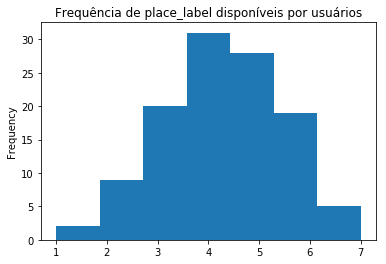

In [4]:
places.groupby(["userid"])["kind_of_place"].count().plot.hist(bins=7, title="Frequência de place_label disponíveis por usuários")

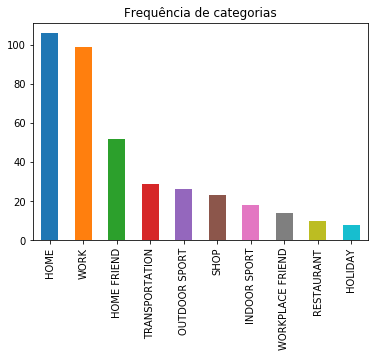

In [5]:
places_per_user = places[["userid", "kind_of_place"]].drop_duplicates()
places_per_user["kind_of_place"].value_counts().plot.bar(title="Frequência de categorias")